In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Forest_fire.csv')
df

,Area,Oxygen,Temperature,Humidity,Fire Occurrence
0,Jharkand,40,45,20,1
1,Bangalore,50,30,10,1
2,Ecuador,10,20,70,0
3,a,60,45,70,1
4,Bangalore,30,48,10,1
5,c,50,15,30,0
6,de,5,35,35,0
7,asd,5,20,70,0
8,Ecuador,60,32,19,1
9,r,30,50,45,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Area             29 non-null     object
 1   Oxygen           39 non-null     int64 
 2   Temperature      39 non-null     int64 
 3   Humidity         39 non-null     int64 
 4   Fire Occurrence  39 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.6+ KB


In [44]:
f_data=df.drop('Area',axis=1)
f_data.head(5)

,Oxygen,Temperature,Humidity,Fire Occurrence
0,40,45,20,1
1,50,30,10,1
2,10,20,70,0
3,60,45,70,1
4,30,48,10,1


Here to balance the feature I estimated some with  their nearby values,so lame :-|

In [5]:
f_data['Humidity'].replace(to_replace=10,value=8,inplace=True)
f_data['Humidity'].replace(to_replace=20,value=18,inplace=True)
f_data['Humidity'].replace(to_replace=(32,35),value=33,inplace=True)
f_data['Humidity'].replace(to_replace=79,value=80,inplace=True)
f_data['Oxygen'].replace(to_replace=30,value=32,inplace=True)
f_data['Oxygen'].replace(to_replace=40,value=42,inplace=True)

In [6]:
#print(f_data['Oxygen'].value_counts(),f_data['Temperature'].value_counts(),f_data['Humidity'].value_counts())

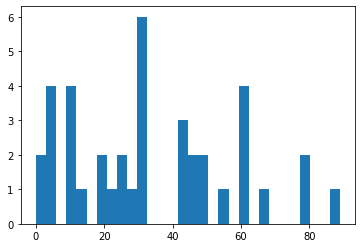

In [7]:
_=plt.hist(f_data['Oxygen'],bins=30)
_=plt.show()

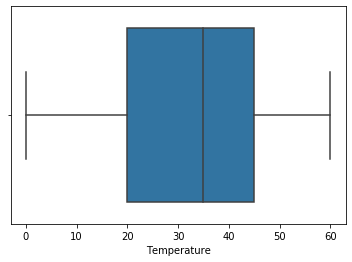

In [8]:
_=sns.boxplot(f_data['Temperature'])
_=plt.show()

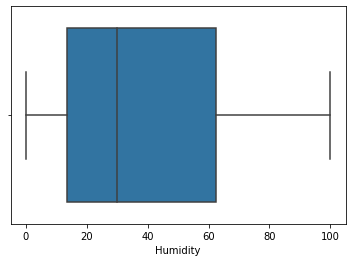

In [9]:
_=sns.boxplot(f_data['Humidity'])
_=plt.show()

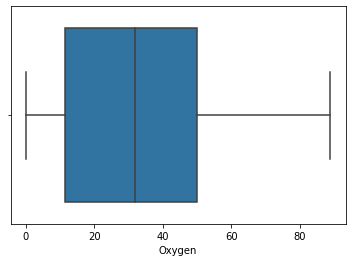

In [10]:
_=sns.boxplot(f_data['Oxygen'])
_=plt.show()

Small dataset like this often overfits due to outliers and thus here no outliers present outside.

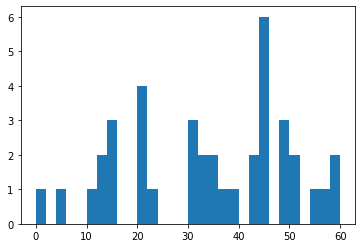

In [11]:
_=plt.hist(f_data['Temperature'],bins=30)
_=plt.show()

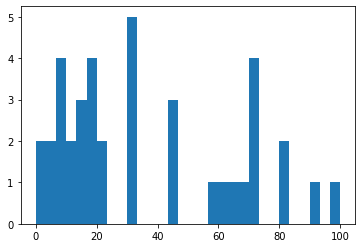

In [12]:
_=plt.hist(f_data['Humidity'],bins=30)
_=plt.show()

In [13]:
f_data['Oxygen'].isnull().value_counts()

False    39
Name: Oxygen, dtype: int64

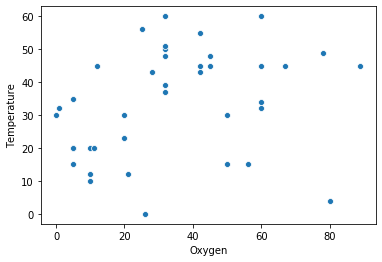

In [14]:
_=sns.scatterplot(x='Oxygen',y='Temperature',data=f_data)
_=plt.show()

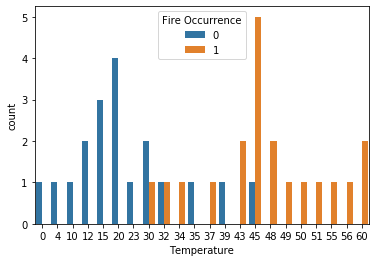

In [15]:
_=sns.countplot(x='Temperature',hue='Fire Occurrence',data=f_data)
_=plt.show()

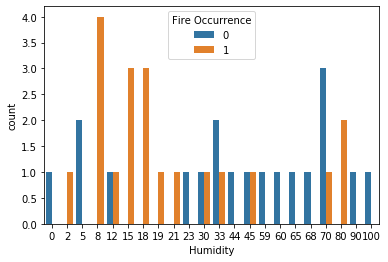

In [16]:
_=sns.countplot(x='Humidity',hue='Fire Occurrence',data=f_data)
_=plt.show()

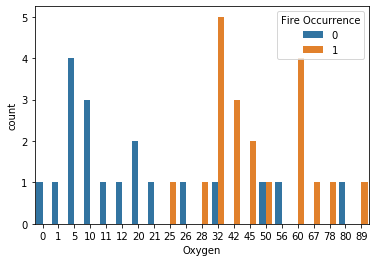

In [17]:
_=sns.countplot(x='Oxygen',hue='Fire Occurrence',data=f_data)
_=plt.show()

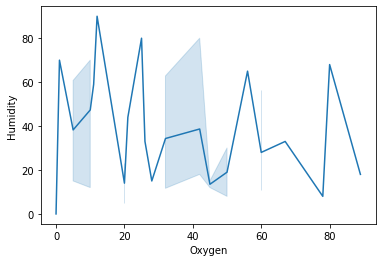

In [18]:
_=sns.lineplot(x='Oxygen',y='Humidity',data=f_data)
_=plt.show()

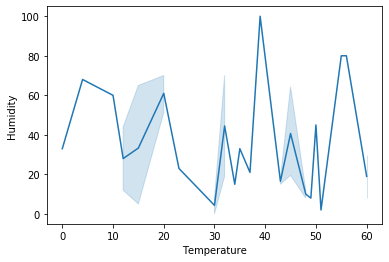

In [19]:
_=sns.lineplot(x='Temperature',y='Humidity',data=f_data)
_=plt.show()

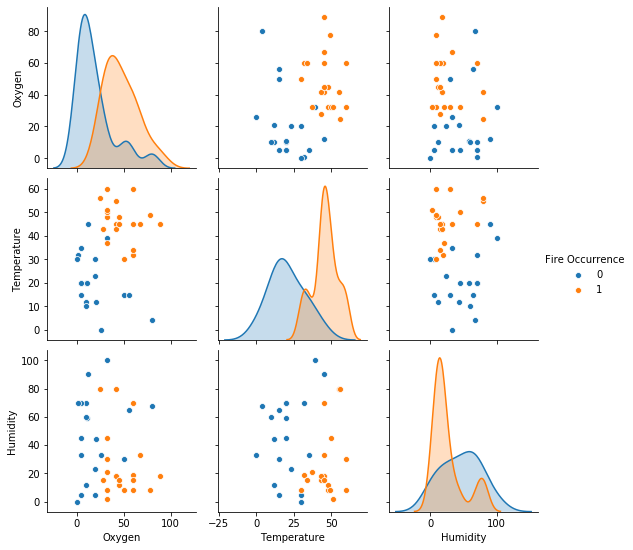

In [20]:
sns.pairplot(f_data,hue='Fire Occurrence')

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,mean_squared_error

In [22]:
f_ydata=f_data.iloc[:,3]
f_Xdata=f_data.iloc[:,0:3]

In [23]:
X_train,X_test,y_train,y_test=train_test_split(f_Xdata,f_ydata,test_size=0.3,random_state=0)

In [24]:
dec_tree=DecisionTreeClassifier()

In [26]:
dec_tree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [28]:
y_pred=dec_tree.predict(X_test)

In [31]:
print(dec_tree.score(X_train,y_train),dec_tree.score(X_test,y_test))

1.0 0.9166666666666666


In [33]:
print(confusion_matrix(y_test,y_pred))

[[6 1]
 [0 5]]


In [35]:
dec_tree.predict_proba(X_test)

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.]])

In [37]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.83      1.00      0.91         5

    accuracy                           0.92        12
   macro avg       0.92      0.93      0.92        12
weighted avg       0.93      0.92      0.92        12



Here we witness the overfitting of the model so to balance the bias-variance tradeoff I used two functions to find considerable 
hyperparameters on maximum_depth and min_samples_leaf.

In [45]:
from sklearn.model_selection import cross_val_score

In [95]:
def cross_val_tree(X,y,depth_range,cv=5,scoring='accuracy'):
    cv_mean_scores=[]
    cv_accuracy_score=[]
    cv_max_depths=[]
    for depth in depth_range:
        tree1=DecisionTreeClassifier(max_depth=depth)
        cv_scores=cross_val_score(tree1,X,y,cv=cv,scoring=scoring)
        cv_mean_scores.append(cv_scores.mean())
        cv_accuracy_score.append(tree1.fit(X,y).score(X,y))
        cv_max_depths.append(depth)
    cv_mean_scores=np.array(cv_mean_scores)
    cv_accuracy_score=np.array(cv_accuracy_score)
    return cv_mean_scores,cv_accuracy_score,cv_max_depths    

In [98]:
f_depth_range=np.arange(0.4,2,0.2)
f_cv_mean_scores,f_accuracy_scores,f_max_depths=cross_val_tree(X_train,y_train,f_depth_range)
pd.Series(data=f_accuracy_scores,index=f_max_depths)

0.4    0.555556
0.6    0.555556
0.8    0.555556
1.0    0.925926
1.2    0.925926
1.4    0.925926
1.6    0.925926
1.8    0.925926
dtype: float64

In [84]:
def cross_val_tree2(X,y,ms_leaf_range,cv=5,scoring='accuracy'):
    cv_mean_scores=[]
    cv_accuracy_score=[]
    samples_by_unit=[]
    for samples in ms_leaf_range:
        tree1=DecisionTreeClassifier(min_samples_leaf=samples)
        cv_scores=cross_val_score(tree1,X,y,cv=cv,scoring=scoring)
        cv_mean_scores.append(cv_scores.mean())
        cv_accuracy_score.append(tree1.fit(X,y).score(X,y))
        samples_by_unit.append(samples)
    samples_by_unit=np.array(samples_by_unit)
    cv_mean_scores=np.array(cv_mean_scores)
    cv_accuracy_score=np.array(cv_accuracy_score)
    return samples_by_unit,cv_accuracy_score,cv_mean_scores

In [92]:
f_msleaf_range=np.arange(1,10,2)
f1_samples_bu,f1_accuracy_scores,f1_cv_mean_scores=cross_val_tree2(X_train,y_train,f_msleaf_range)
pd.DataFrame(f1_accuracy_scores,index=f1_samples_bu)

,0
1,1.000000
3,0.962963
5,0.925926
7,0.925926
9,0.925926


In [25]:
dec_tree2=DecisionTreeClassifier(max_depth=1,min_samples_leaf=4)

In [27]:
dec_tree2.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [29]:
y_pred2=dec_tree2.predict(X_test)

In [30]:
#print("Mean squared error of model- {}".format(np.sqrt(mean_squared_error(y_test,y_pred))))

Mean squared error of model- 0.28867513459481287


In [32]:
print(dec_tree2.score(X_train,y_train),dec_tree2.score(X_test,y_test))

0.9259259259259259 0.75


In [34]:
print(confusion_matrix(y_test,y_pred2))

[[4 3]
 [0 5]]


In [36]:
dec_tree2.predict_proba(X_test)

array([[0.11764706, 0.88235294],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.11764706, 0.88235294],
       [0.11764706, 0.88235294],
       [0.11764706, 0.88235294],
       [0.11764706, 0.88235294],
       [0.11764706, 0.88235294],
       [1.        , 0.        ],
       [0.11764706, 0.88235294],
       [0.11764706, 0.88235294]])

In [38]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       1.00      0.57      0.73         7
           1       0.62      1.00      0.77         5

    accuracy                           0.75        12
   macro avg       0.81      0.79      0.75        12
weighted avg       0.84      0.75      0.74        12



Pickling the file

In [39]:
import pickle
import requests
import json

In [40]:
filename='fire_pickle.pkl'

In [41]:
pickle.dump(dec_tree2,open(filename,'wb'))

In [42]:
fire_model=pickle.load(open('fire_pickle.pkl','rb'))

In [43]:
prediction=fire_model.predict_proba([[40,40,10]])
output='{0:.{1}f}'.format(prediction[0][1], 2)
print(output,prediction)

0.88 [[0.11764706 0.88235294]]
